In [9]:
from Model_block import Encode
from data_set import train_set
import torch
import torch.nn as nn
import numpy as np
from Task_block import contrastive_loss
from torch.utils.data import DataLoader
from Task_block import task_1
from tqdm import tqdm    # 进度条
from torch.optim.lr_scheduler import CosineAnnealingLR

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [11]:
train_data = train_set

In [12]:
train_loader = DataLoader(dataset=train_data,batch_size=1,shuffle=True)

In [13]:
train_model = Encode().to(device)
optimizer = torch.optim.Adam(train_model.parameters(), lr=0.00001)  # 优化器
scheduler = CosineAnnealingLR(optimizer, T_max=10)  # 100epoch完成一个余弦周期

In [14]:
num_epochs = 20
train_losses = []
# 训练阶段
train_model.train()
for epoch in range(num_epochs):
    train_loss = 0.0
    # 创建进度条
    progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for x in progress:
        # 前向传播
        x1 = x.squeeze(0)  # 输入 (8, 22, 512)
        x1 = x1.to(device)
        x2 = task_1(x1).to(device)
        output_1 = train_model(x1)
        output_2 = train_model(x2)
        loss = contrastive_loss(output_1, output_2).to(device)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # 更新进度条显示
        progress.set_postfix(loss=loss.item())
    scheduler.step()  # 更新学习率
    # 计算epoch平均损失
    epoch_train_loss = train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    print(f'Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}')
    

Epoch 1/20: 100%|██████████| 1800/1800 [00:56<00:00, 32.10it/s, loss=0.797]


Epoch 1 - Train Loss: 0.9671


Epoch 2/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.35it/s, loss=0.734]


Epoch 2 - Train Loss: 0.8283


Epoch 3/20: 100%|██████████| 1800/1800 [00:58<00:00, 30.82it/s, loss=0.843]


Epoch 3 - Train Loss: 0.7954


Epoch 4/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.52it/s, loss=0.765]


Epoch 4 - Train Loss: 0.7790


Epoch 5/20: 100%|██████████| 1800/1800 [00:59<00:00, 30.35it/s, loss=0.861]


Epoch 5 - Train Loss: 0.7711


Epoch 6/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.12it/s, loss=0.682]


Epoch 6 - Train Loss: 0.7661


Epoch 7/20: 100%|██████████| 1800/1800 [00:58<00:00, 30.75it/s, loss=0.718]


Epoch 7 - Train Loss: 0.7633


Epoch 8/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.28it/s, loss=0.685]


Epoch 8 - Train Loss: 0.7609


Epoch 9/20: 100%|██████████| 1800/1800 [00:56<00:00, 31.60it/s, loss=0.707]


Epoch 9 - Train Loss: 0.7597


Epoch 10/20: 100%|██████████| 1800/1800 [00:56<00:00, 31.82it/s, loss=0.764]


Epoch 10 - Train Loss: 0.7593


Epoch 11/20: 100%|██████████| 1800/1800 [00:59<00:00, 30.37it/s, loss=0.704]


Epoch 11 - Train Loss: 0.7590


Epoch 12/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.09it/s, loss=0.795]


Epoch 12 - Train Loss: 0.7594


Epoch 13/20: 100%|██████████| 1800/1800 [00:57<00:00, 31.56it/s, loss=0.754]


Epoch 13 - Train Loss: 0.7583


Epoch 14/20:  13%|█▎        | 236/1800 [00:07<00:50, 31.11it/s, loss=0.754]


KeyboardInterrupt: 

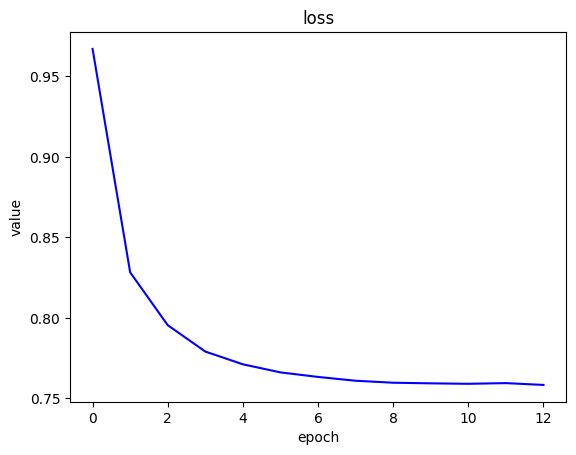

In [15]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.plot(train_losses, label='训练损失', color='blue')
# 添加标题和图例
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
# 显示图形
plt.show()

In [ ]:
# torch.save(train_model.state_dict(), 'train_1_weights.pth')

#### epoch = 50
#### 文件数量 = 8
#### 学习率 = 0.001 （余弦退火）
#### 优化器 = Adam

# 损失 >= 0.7